## Imports

In [1]:
import pandas as pd
import numpy as np
import re
from connection_keys import connection
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)

pd.set_option('display.max_colwidth', None)

from utils import transforma_campo_str_int

### Conexão com o banco e captura os dados

In [80]:
connectionbd = connection('db_hardware')
query = """
    select * from graphic_card
"""
df = pd.read_sql(query, connectionbd)

### Apresentação de uma amostra dos dados e dos tipo em que estão vindo

In [81]:
print('Tipo dos campso')
display(df.dtypes)
print('Amostra')
display(df.sample(5))

Tipo dos campso


id                      int64
marca                  object
nome_produto           object
preco_antigo_cartao    object
preco_atual_cartao     object
preco_boleto           object
data                   object
hora                   object
loja                   object
disponibilidade        object
dtype: object

Amostra


,id,marca,nome_produto,preco_antigo_cartao,preco_atual_cartao,preco_boleto,data,hora,loja,disponibilidade
400,401,Gigabyte,"Placa de Vídeo Gigabyte NVIDIA GeForce GTX 1660 OC 6G, GDDR5 - GV-N1660OC-6GD","2.157,79","2.052,53","1.949,90",2020-09-11,18:56:58,Kabum,Disponivel
340,341,Gigabyte,"Placa de Vídeo Gigabyte NVIDIA GeForce RTX 2060 Super Gaming OC 8G, GDDR6 - GV-N206SGAMING OC-8GC",0,"3.449,29","2.931,90",2020-09-10,19:12:39,Kabum,Indisponivel
1469,1470,Evga,"Placa de Vídeo EVGA NVIDIA GeForce GTX 1660 XC Ultra Gaming 6GB, GDDR5 - 06G-P4-1167-KR",0,"1.882,24","1.599,90",2020-09-14,18:27:27,Kabum,Indisponivel
394,395,Galax,"Placa de Vídeo Galax NVIDIA GeForce GT 710 1GB, DDR3 - 71GGF4DC00WG","315,68","294,63","279,90",2020-09-11,18:56:58,Kabum,Disponivel
2325,2940,Galax,"Placa de Vídeo Galax NVIDIA RTX 2060 EX White (1-Click OC) 6GB, GDDR6 - 26NRL7HPY3EW","2.947,26","2.736,74","2.599,90",2020-09-17,19:23:41,Kabum,Disponivel


#### Primeiro método para checar ruidos nos dados, a intenção é pegar oq não se enquadra como  placa de video

In [84]:
def get_resume_product_name(name):
    # string = df['nome_produto'][df['id'] == 259].item()
    pattern = "(RTX|GTX|GT|RX|WX|Quadro|R7|R5|R9|HD)(\d+)"
    resume_name = re.search(pattern, name.replace(" ", ""))
    if resume_name is None: 
        return '' 
    else: 
        return resume_name.group()

df['nome_produto_resumido'] = df.apply(lambda x: get_resume_product_name(x['nome_produto']), axis=1)

In [106]:
display(len(df.query('nome_produto_resumido == ""')))
df.query('nome_produto_resumido == ""')

76

,id,marca,nome_produto,preco_antigo_cartao,preco_atual_cartao,preco_boleto,data,hora,loja,disponibilidade,nome_produto_resumido
197,198,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO P2000, 5GB, GDDR5 - VCQP2000",4588.12,4512.82,3835.90,2020-09-10,19:12:39,Kabum,Disponivel,
207,208,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO NVS 810 4GB, DDR3 - VCNVS810DVI",5947.90,5623.41,4779.90,2020-09-10,19:12:39,Kabum,Disponivel,
208,209,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO P620, 2GB, GDDR5 - VCQP620V2-PORPB",0.00,1764.59,1499.90,2020-09-10,19:12:39,Kabum,Disponivel,
250,251,Asus,PLACA DE VIDEO ASUS AMD RADEON R9 FURY X 4GB - R9FURYX-4G,0.00,3529.29,2999.90,2020-09-10,19:12:39,Kabum,Indisponivel,
302,303,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO P1000 4GB, GDDR5 - VCQP1000",0.00,3216.90,2734.36,2020-09-10,19:12:39,Kabum,Indisponivel,
...,...,...,...,...,...,...,...,...,...,...,...
3381,3996,Sapphire,"PLACA DE VÍDEO SAPPHIRE AMD RADEON GPRO 6200 4GB, GDDR5 - 32258-00-21G",0.00,1732.82,1472.90,2020-09-19,13:58:21,Kabum,Indisponivel,
3427,4042,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO P1000 4GB, GDDR5 - VCQP1000",0.00,3216.90,2734.36,2020-09-19,13:58:21,Kabum,Indisponivel,
3446,4061,XFX,"PLACA DE VÍDEO XFX AMD ONE SERIES 2GB 6570 PLUS, DDR3 - ON-XFX1-PLUS",0.00,266.94,226.90,2020-09-19,13:58:21,Kabum,Indisponivel,
3509,4124,Pny,"PLACA DE VÍDEO PNY NVIDIA QUADRO P400, 2GB, GDDR5 - VCQP400V2PB",0.00,1311.65,1114.90,2020-09-19,13:58:21,Kabum,Indisponivel,


#### Drop dos dados que foram pegos na limpeza dos dados como não sendo placas de videos para analise

In [107]:
indexNames = df.query('nome_produto.str.contains("SUPORTE") | nome_produto.str.contains("CASE")').index
df.drop(indexNames , inplace=True)
del df['nome_produto_resumido']

### Modelagem dos campos para a analise

In [109]:
# df.apply(lambda x: concatena_numero_apolice_seguradora(x['insurerCode'], x['insurerPolicyNumber']),axis=1)
df['preco_antigo_cartao'] = df['preco_antigo_cartao'].str.replace('.', '').str.replace(',', '.').astype(float)
df['preco_atual_cartao'] = df['preco_atual_cartao'].str.replace('.', '').str.replace(',', '.').astype(float)
df['preco_boleto'] = df['preco_boleto'].str.replace('.', '').str.replace(',', '.').astype(float)
df['nome_produto'] = df['nome_produto'].str.upper() 

# Analise

#### Verificando qual marca de placa de video tem em média o maior preço

In [79]:
df_marcas = df['preco_atual_cartao'].groupby(df['marca']).mean().sort_values(ascending=False)
print(df_marcas)

marca
Aorus         9028.693556
Amd           5921.450000
Gainward      4990.583333
Colorful      4827.015000
Pny           4597.157778
Evga          3523.667603
Galax         3159.752471
Asus          3009.880352
Gigabyte      2701.315779
MSI           2665.328090
Zotac         2394.064464
ASRock        2246.639402
Sapphire      2237.029147
XFX           2195.962593
Powercolor    1698.781944
Husky          823.410000
PCYes          538.203750
Afox           404.928611
Name: preco_atual_cartao, dtype: float64


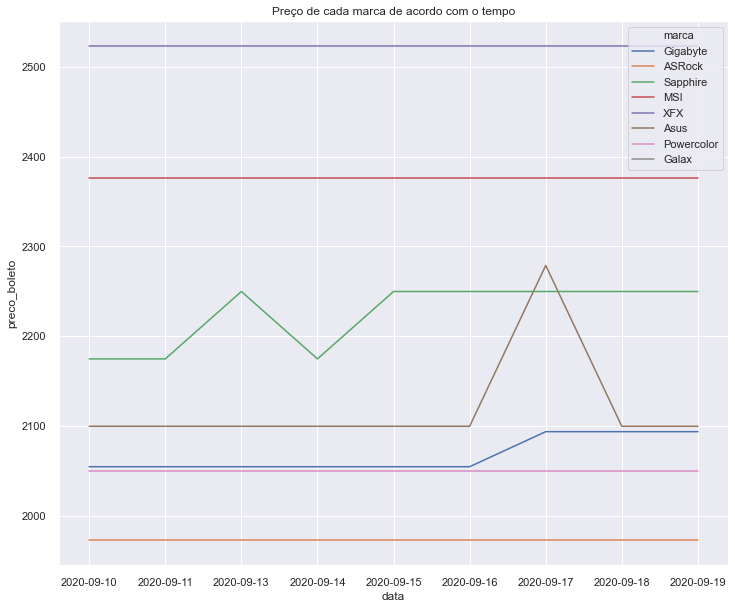

In [65]:
placa = 'RX 5600'
analise = df.query(f'nome_produto.str.contains("{placa}") & (~nome_produto.str.contains("TI") & ~nome_produto.str.contains("SUPER"))')
# (analise['preco_atual_cartao'].groupby(analise['marca']).mean())
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(
    x="data",
    y="preco_boleto",
    hue='marca',
    data=analise,
    ci=None,
    markers=True
).set_title('Preço de cada marca de acordo com o tempo');

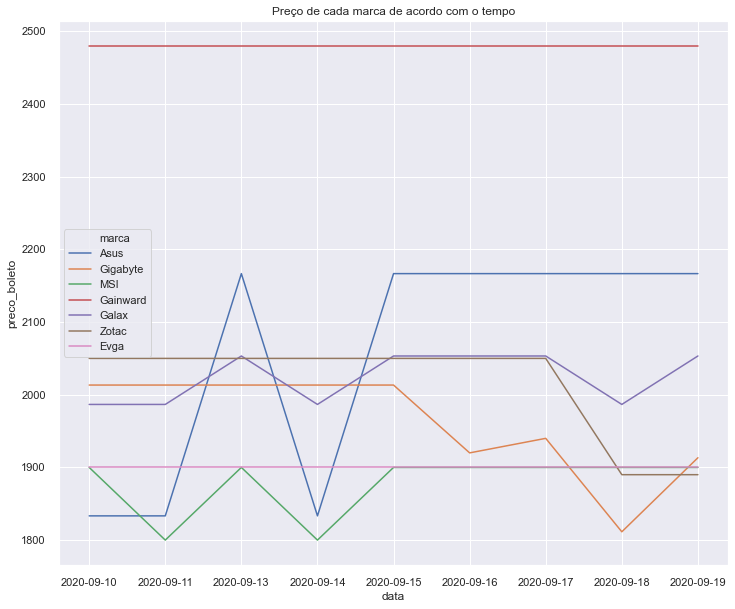

In [66]:
placa = 'GTX 1660 SUPER'
analise = df.query(f'nome_produto.str.contains("{placa}")')
# (analise['preco_atual_cartao'].groupby(analise['marca']).mean())
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(
    x="data",
    y="preco_boleto",
    hue='marca',
    data=analise,
    ci=None,
    markers=True
).set_title('Preço de cada marca de acordo com o tempo');

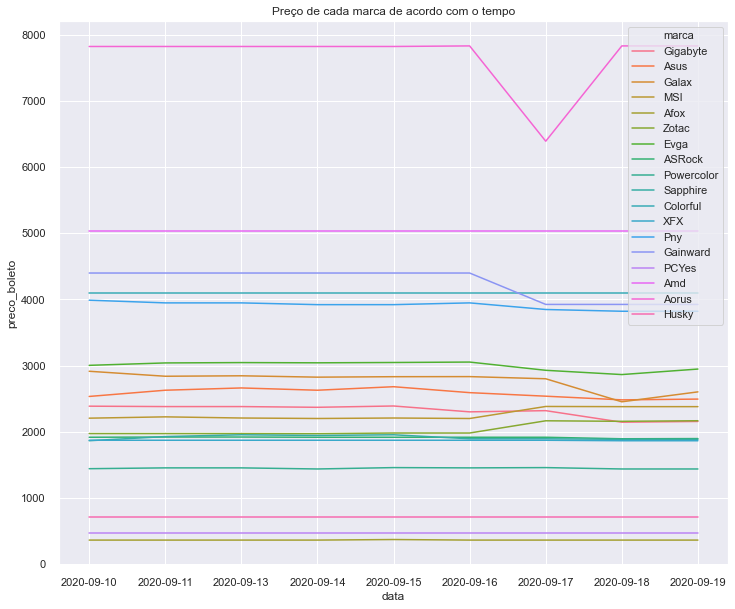

In [68]:
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.lineplot(
    x="data",
    y="preco_boleto",
    hue='marca',
    data=df,
    ci=None,
    markers=True
).set_title('Preço de cada marca de acordo com o tempo');